In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/vedantsingh/Downloads/winequality-red.csv")

# understanding the dataset

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [23]:
# the quality depends on multiple factors (hence multivariate linear regression) and ranges from 3 to 8

In [60]:
# now we need to divide this dataset into training and testing datasets
# the ratio I am choosing is 4 : 1

def split (df, x_train, y_train, x_test, y_test) :
    for i, rows in df.iterrows() :
        if i < 1280 :
            d = df.iloc[i].values
            x_train[i][0] = 1 # initialising the first feature as 1
            x_train[i][1:] = d[0:11:1]
            y_train[i] = d[11]
        elif i >= 1280 and i < 1600 :
            d = df.iloc[i].values
            x_test[i - 1280][0] = 1
            x_test[i - 1280][1:] = d[0:11:1]
            y_test[i - 1280] = d[11]
            
        
    return (x_train, y_train, x_test, y_test)
    
            
        

In [61]:
x_train = np.zeros(shape = (1280, 12))
y_train = np.zeros(shape = 1280)
x_test = np.zeros(shape = (319, 12))
y_test = np.zeros(shape = 319)

x_train, y_train, x_test, y_test = split(df, x_train, y_train, x_test, y_test)


In [66]:
# now that we have divided are datasets, we are ready to write the linear regression function

def mvlregression (coeff, x_train, y_train, m, l_rate, iterations) :
    x_train_trans = x_train.transpose()
    
    for i in range (0, iterations) :
        hypothesis = np.dot(x_train, coeff) 
        
        cost_f = np.sum(abs(hypothesis - y_train)) / (2 * m) 
        
        grad = np.dot(x_train_trans, (hypothesis - y_train)) / m 
        coeff = coeff - (l_rate * grad) 
    print(cost_f)
    return coeff



In [85]:
m, n = np.shape(x_train)

coeff = np.ones(n)
l_rate = 0.00004 # choosing an appropriate learning rate

iterations = 1000000
coeff = mvlregression(coeff, x_train, y_train, m, l_rate, iterations)

coeff

0.26040074774783917


array([ 0.78498809, -0.00972688, -0.17848663,  0.7612097 , -0.00648506,
        0.68704832,  0.00639065, -0.00460273,  0.78120002,  0.0763553 ,
        0.67466032,  0.32960138])

In [86]:
predictions = np.dot(x_train, coeff)

predictions

array([5.06531806, 5.1658025 , 5.19591935, ..., 5.26896702, 5.01557479,
       6.13417596])

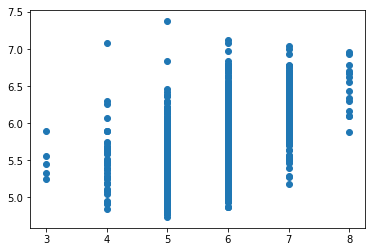

In [87]:
plt.scatter(y_train, predictions)
plt.show()